# Big Data Real-Time Analytics with Python and Spark

## Chapter 10 -  Machine learning in python language Part 2

### Mini project 2 - Process for Building, Training, Evaluating and Selecting Models for Regression

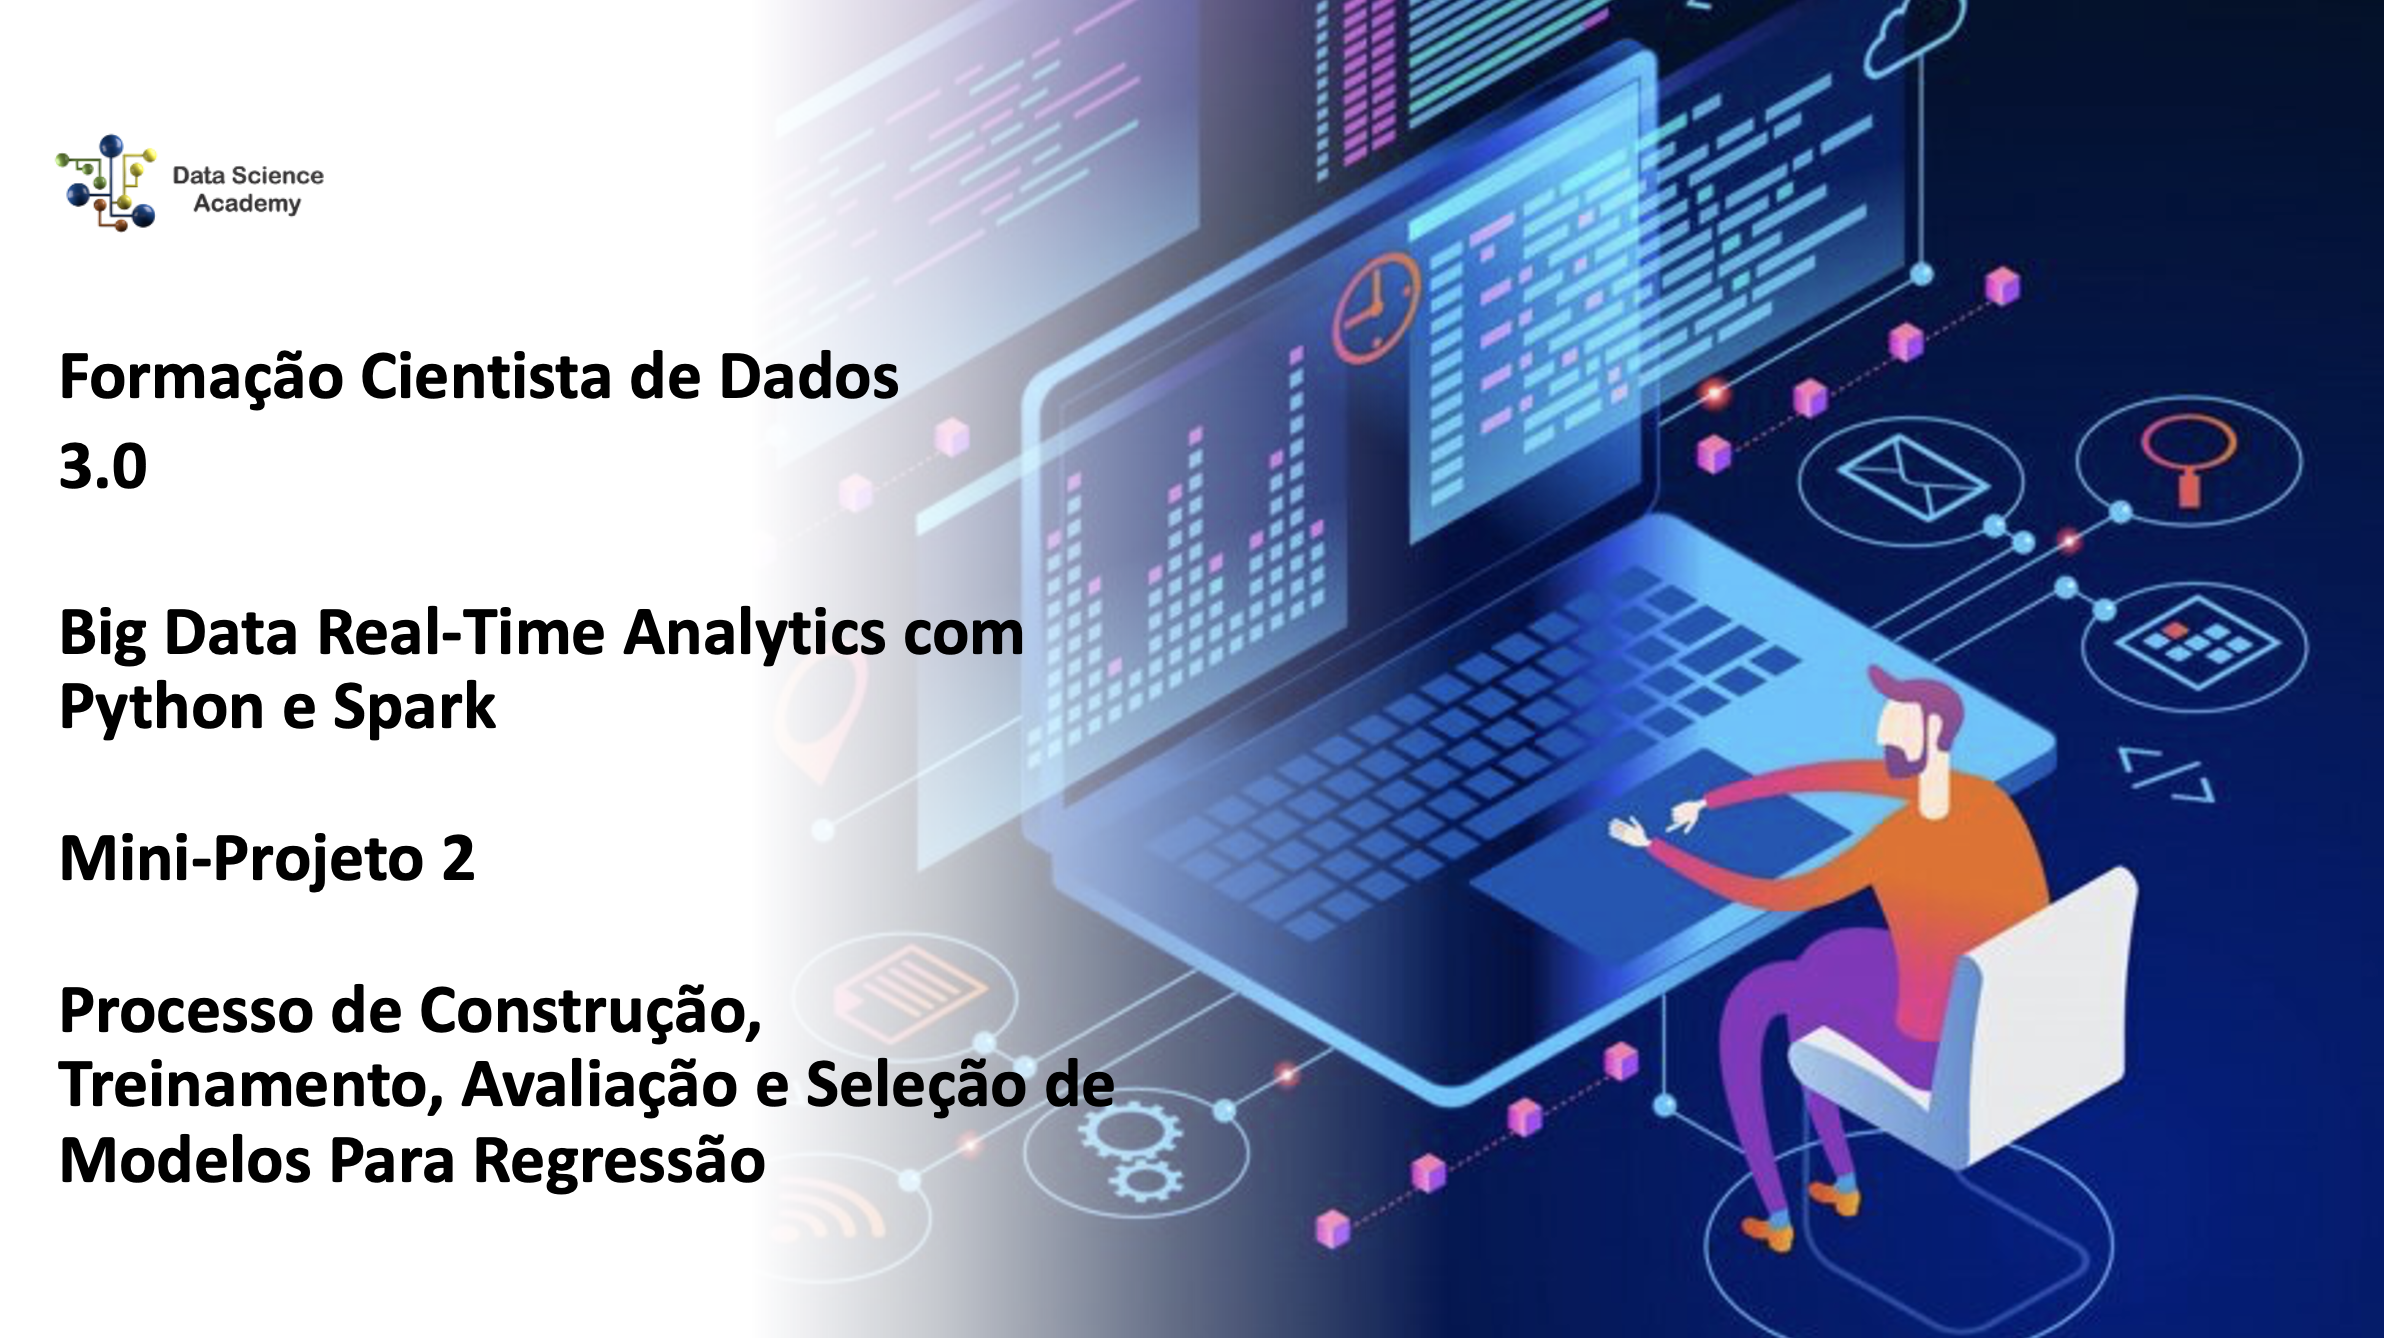

In [1]:
# Python version
from platform import python_version
print('The version used in this notebook is: ', python_version())

The version used in this notebook is:  3.8.13


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
%reload_ext watermark
%watermark -a 'Bianca Amorim' --iversions

Author: Bianca Amorim

numpy     : 1.22.3
pandas    : 1.4.2
sklearn   : 1.1.3
matplotlib: 3.4.3
seaborn   : 0.11.2



## Loading dataset

In [4]:
# Loading dataset
dataset = pd.read_csv('datasets/dataset.csv')

In [5]:
# Shape
dataset.shape

(500, 5)

In [6]:
# Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tempo_cadastro_cliente           500 non-null    float64
 1   numero_medio_cliques_por_sessao  500 non-null    float64
 2   tempo_total_logado_app           500 non-null    float64
 3   tempo_total_logado_website       500 non-null    float64
 4   valor_total_gasto                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [7]:
# Sample
dataset.sample(10)

tempo_cadastro_cliente  numero_medio_cliques_por_sessao  \
272                3.641497                        32.351478   
441                4.791109                        32.592093   
70                 4.214495                        33.792039   
343                2.898300                        33.026420   
374                2.190132                        33.144234   
308                3.784273                        34.555283   
406                3.535802                        32.784940   
186                2.910038                        33.924625   
146                3.428860                        31.389585   
131                3.917451                        32.605584   

     tempo_total_logado_app  tempo_total_logado_website  valor_total_gasto  
272               13.105159                   35.574842         532.935219  
441               10.314718                   36.729029         493.181261  
70                12.507525                   37.142862         591.197178  
343               13.186813                   38.066930         489.908053  
374               11.737041                   37.935189         424.202827  
308               11.777772                   37.979827         554.003093  
406               12.451200                   36.665791         486.163799  
186               11.911416                   38.274702         460.061277  
146               10.994224                   38.074452         410.069611  
131               12.068816                   36.105001         505.113343

In [8]:
dataset.rename(columns = {'tempo_cadastro_cliente': 'client_registration_time',
                         'numero_medio_cliques_por_sessao': 'average_clicks_per_session',
                         'tempo_total_logado_app': 'total_time_logged_app',
                         'tempo_total_logado_website': 'total_time_logged_website',
                         'valor_total_gasto': 'total_spent'}, inplace = True)

## Exploratory Data Analysis

In [9]:
# Columns
dataset.columns

Index(['client_registration_time', 'average_clicks_per_session',
       'total_time_logged_app', 'total_time_logged_website', 'total_spent'],
      dtype='object')

In [10]:
# Correlation table
dataset.corr()

client_registration_time  \
client_registration_time                    1.000000   
average_clicks_per_session                  0.060247   
total_time_logged_app                       0.029143   
total_time_logged_website                  -0.047582   
total_spent                                 0.809084   

                            average_clicks_per_session  total_time_logged_app  \
client_registration_time                      0.060247               0.029143   
average_clicks_per_session                    1.000000              -0.027826   
total_time_logged_app                        -0.027826               1.000000   
total_time_logged_website                    -0.034987               0.082388   
total_spent                                   0.355088               0.499328   

                            total_time_logged_website  total_spent  
client_registration_time                    -0.047582     0.809084  
average_clicks_per_session                  -0.034987     0.355088  
total_time_logged_app                        0.082388     0.499328  
total_time_logged_website                    1.000000    -0.002641  
total_spent                                 -0.002641     1.000000

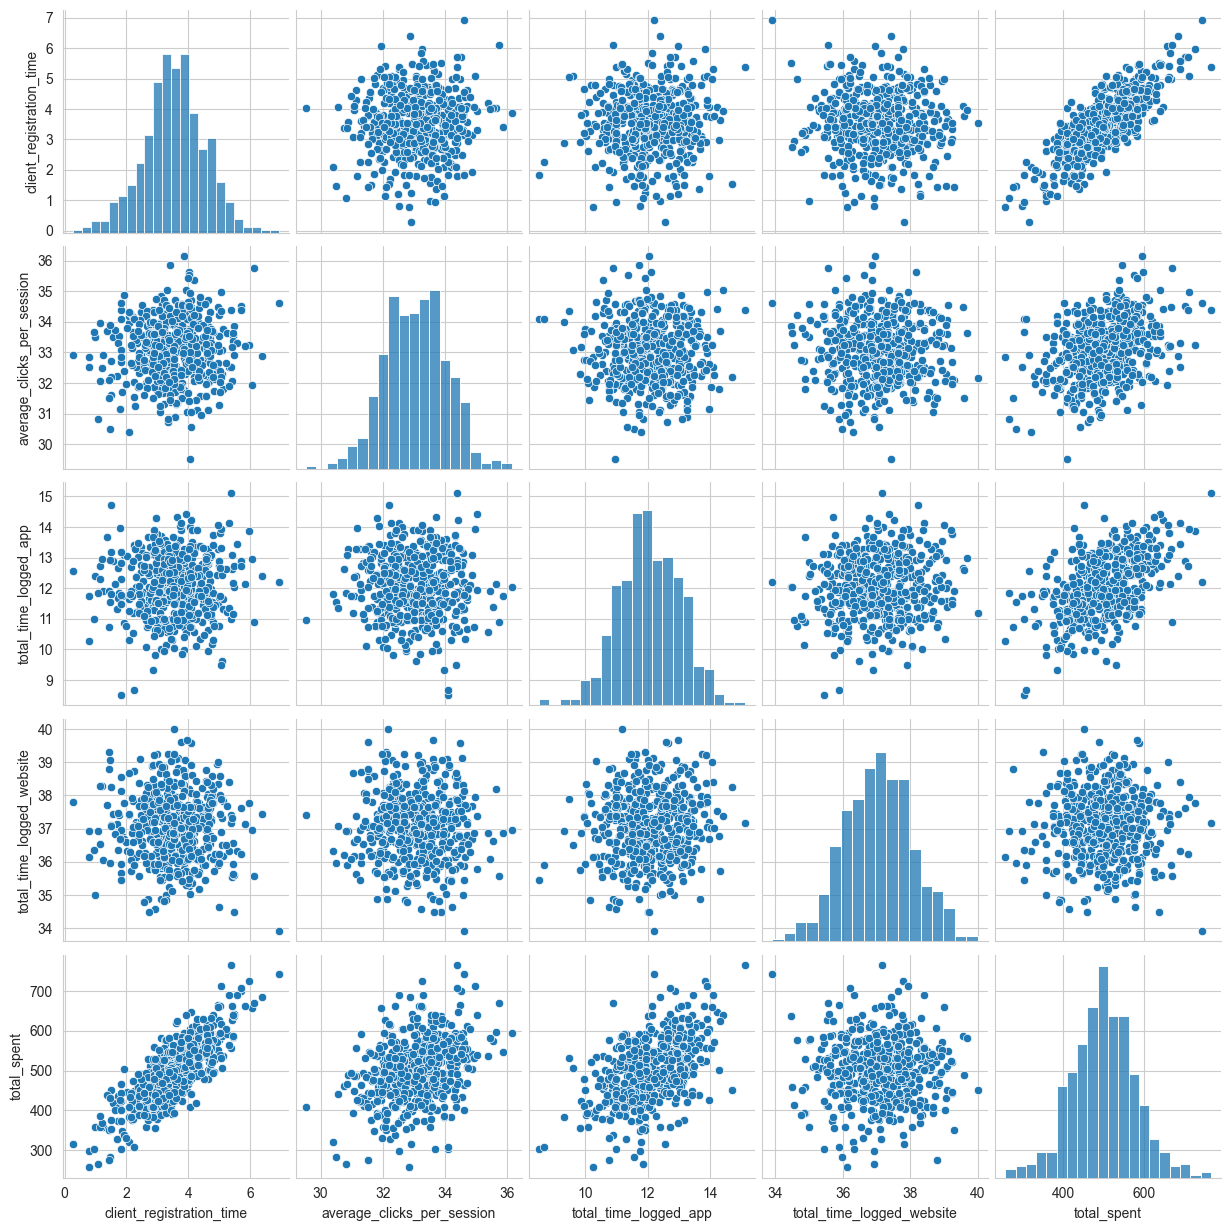

In [11]:
# Correlation plot
sns.pairplot(dataset);

### Analysis 1 - Relationship Between Time on the Website and Total Spent

<Figure size 1800x1200 with 0 Axes>

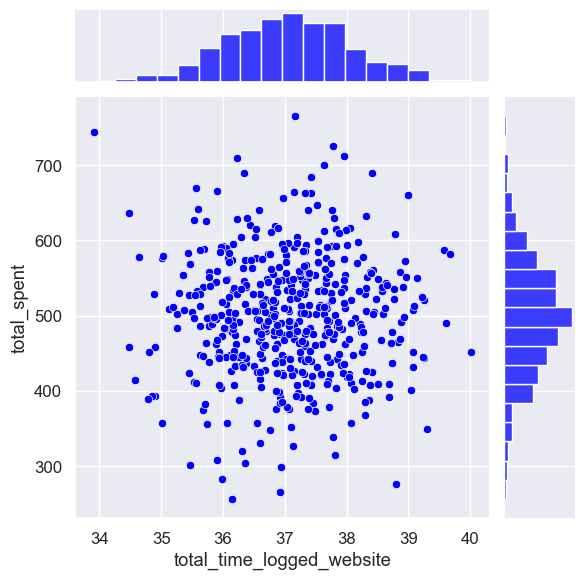

In [16]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.1)
sns.jointplot(data = dataset,
             x = 'total_time_logged_website',
             y = 'total_spent',
             color = 'blue');

- Looking at the histograms, we can see that the data is normally distributed (It follows a normal distribution).

- Looking at the scatter plot, there seems to be no correlation between the two variables. Let's confirm by calculating the correlation coefficient between them.

In [18]:
# Correlation
dataset[['total_time_logged_website', 'total_spent']].corr()

total_time_logged_website  total_spent
total_time_logged_website                   1.000000    -0.002641
total_spent                                -0.002641     1.000000

There seems to be no correlation between time logged on to the website and the amount spent by customers.

### Analysis 2 - Relationship Between Time on the App and Total Spent

In [19]:
# columns
dataset.columns

Index(['client_registration_time', 'average_clicks_per_session',
       'total_time_logged_app', 'total_time_logged_website', 'total_spent'],
      dtype='object')

<Figure size 1800x1200 with 0 Axes>

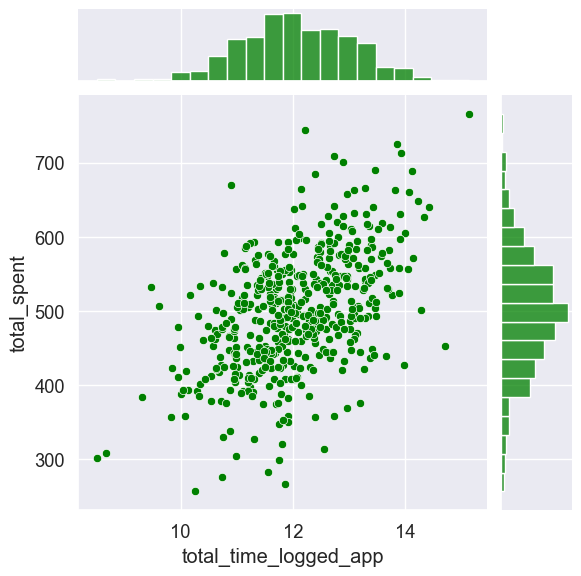

In [20]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dataset,
             x = 'total_time_logged_app',
             y = 'total_spent',
             color = 'green');

- Looking at the histograms, we can see that the data is normally distributed (It follows a normal distribution)

- Looking at the scatter plot, there seems to be a positive correlation between the two variables. Let's confirm by calculating the correlation coefficient between them.

In [21]:
# Correlation
dataset[['total_time_logged_app', 'total_spent']].corr()

total_time_logged_app  total_spent
total_time_logged_app               1.000000     0.499328
total_spent                         0.499328     1.000000

The data has a moderate positive correlation. We can deduce that the total amount spent monthly tends to increase if the customer spends more time logged into the app.

### Analysis 3 - Relationship Between Time on the App and Registration Time

In [22]:
# Columns
dataset.columns

Index(['client_registration_time', 'average_clicks_per_session',
       'total_time_logged_app', 'total_time_logged_website', 'total_spent'],
      dtype='object')

<Figure size 1800x1200 with 0 Axes>

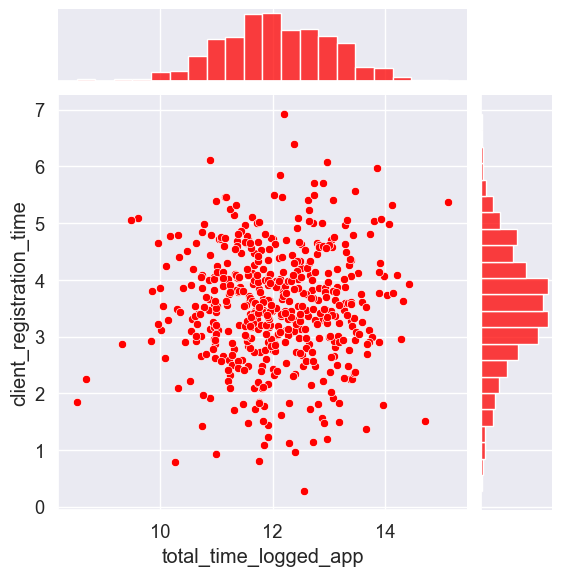

In [24]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dataset,
            x = 'total_time_logged_app',
            y = 'client_registration_time',
            color = 'red');

- Looking at the histograms, we can see that the data is normally distributed (follows a normal distribution).

- From the scatter plot we can see that the data is very dense in the middle of the graph, and there is no clear correlation. We can deduce that there are many customers who have been members for 3-4 years and spend approximately 11.5 to 12.5 minutes on the app.

### Analysis 4  - Relationship Between Registration Time and Total Spent

In [26]:
# Columns
dataset.columns

Index(['client_registration_time', 'average_clicks_per_session',
       'total_time_logged_app', 'total_time_logged_website', 'total_spent'],
      dtype='object')

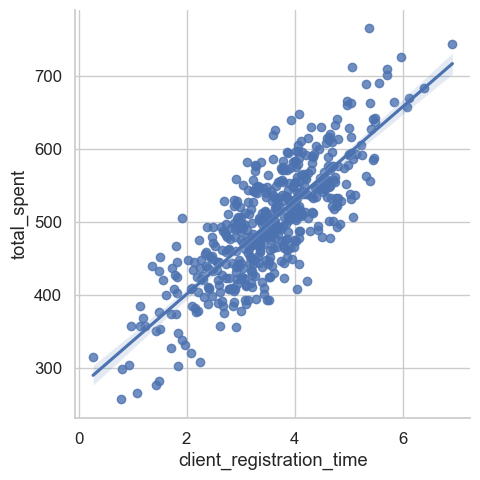

In [28]:
# Plot
sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
sns.lmplot(y = 'total_spent', x = 'client_registration_time', data = dataset);

In [29]:
#  Correlation
dataset[['client_registration_time', 'total_spent']].corr()

client_registration_time  total_spent
client_registration_time                  1.000000     0.809084
total_spent                               0.809084     1.000000

- From the Implot and the correlation coefficient, we can see that the time of registration and the total amount spent has a strong positive correlation, that is, as the client becomes older (more time of registration), the total amount spent by clients also increases. 
- Another thing to note is that the shadow around the line is very thin, which means that the error between the estimate (line) and the data points is relatively small.

### Analysis 4  - Relationship Between Total Time Logged into App and Total Time Logged into Website

In [31]:
# Columns
dataset.columns

Index(['client_registration_time', 'average_clicks_per_session',
       'total_time_logged_app', 'total_time_logged_website', 'total_spent'],
      dtype='object')

<Figure size 1800x1200 with 0 Axes>

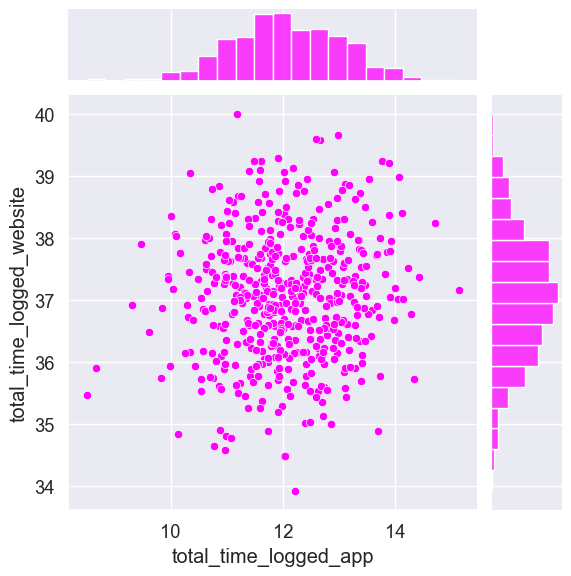

In [33]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dataset, x = 'total_time_logged_app', y = 'total_time_logged_website', color = 'magenta');

We have not detected critical problems and can move forward. We will keep the predictor variable with a low correlation and validate this relationship with the target variable in the final model.

## Data Preprocessing to Build Machine Learning Models

In [34]:
dataset.columns

Index(['client_registration_time', 'average_clicks_per_session',
       'total_time_logged_app', 'total_time_logged_website', 'total_spent'],
      dtype='object')

In [45]:
dataset.shape

(500, 5)

In [35]:
# Input variables (predictor variable)
X = dataset[['client_registration_time', 
            'average_clicks_per_session', 
            'total_time_logged_app', 
            'total_time_logged_website']]

In [36]:
# Output variable (Target variable)
y = dataset['total_spent']

In [37]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [38]:
len(X_train)

350

In [39]:
len(X_test)

150

### Standardization

In [46]:
scaler = StandardScaler()

In [47]:
scaler.fit(X_train)

StandardScaler()

In [48]:
X_train = scaler.transform(X_train)

In [49]:
X_test = scaler.transform(X_test)

In [50]:
X_train[:5]

array([[-0.21902935, -0.23735512,  0.33914084,  0.92765292],
       [ 1.8073082 ,  0.09393489,  1.05266311,  0.2388907 ],
       [-0.00962736, -0.47064535, -0.26005737,  0.81461639],
       [-0.06171807, -0.23157636, -0.19229742, -0.26198867],
       [-2.03669802, -1.54671013, -1.27813419,  1.65800995]])

In [51]:
X_test[:5]

array([[-0.74134552,  0.35042401,  1.32428694,  0.85663193],
       [ 0.51634261,  0.33850011,  1.36472848,  0.1071885 ],
       [ 1.22462847, -0.84278168,  1.70184401,  0.88678948],
       [ 0.48199668, -0.30436824, -0.65228214, -1.76956776],
       [ 1.88519232, -0.14493923,  0.70658414, -1.44006612]])

## Building, Training and Evaluating Model 1 with Logistic Regression (Benchmark)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

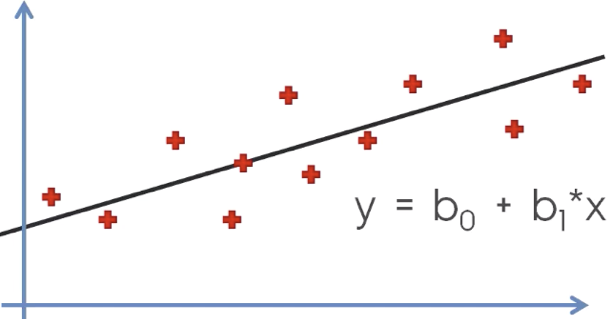

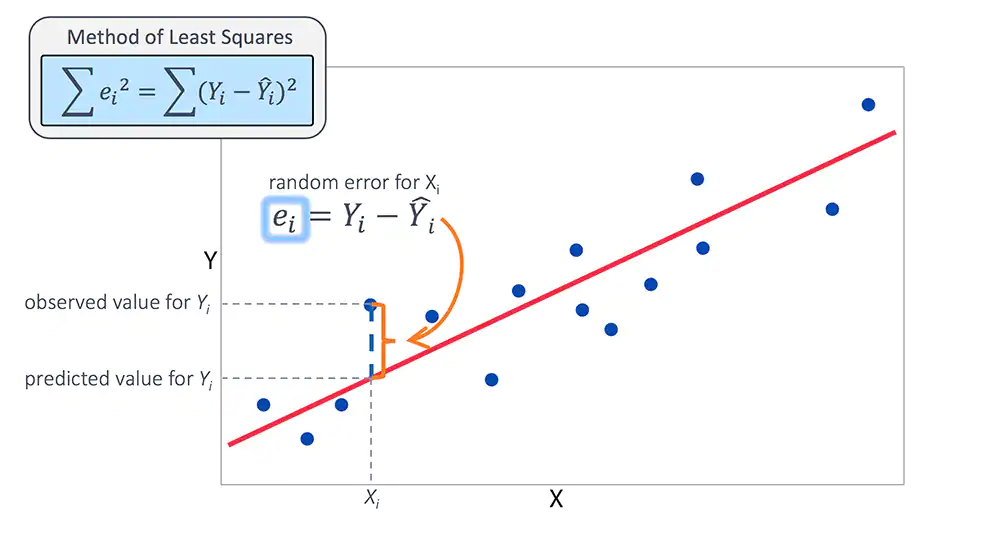

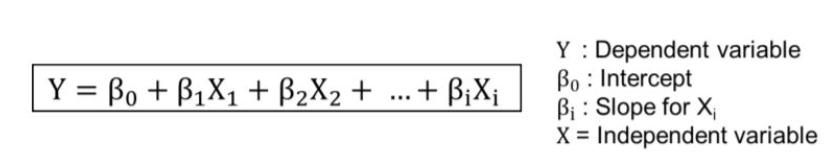

In [52]:
# Create the model
model_v1 = LinearRegression()

In [53]:
# Training
model_v1.fit(X_train, y_train)

LinearRegression()

In [54]:
print('Coefficients: \n', model_v1.coef_)

Coefficients: 
 [63.74220716 26.23901606 38.57185551  0.6847366 ]


In [55]:
# Coefficients of the predictor variables
df_coef = pd.DataFrame(model_v1.coef_, X.columns, columns = ['Coefficients'])
df_coef

Coefficients
client_registration_time       63.742207
average_clicks_per_session     26.239016
total_time_logged_app          38.571856
total_time_logged_website       0.684737

### Model Evaluation

In [56]:
# Predictions with test data
pred_v1 = model_v1.predict(X_test)

In [57]:
# Print the first 10 predictions
pred_v1[:10]

array([513.06429807, 593.96597774, 621.6550031 , 495.82353395,
       642.08919639, 615.61800045, 592.1273355 , 493.61084354,
       457.58835597, 532.03644608])

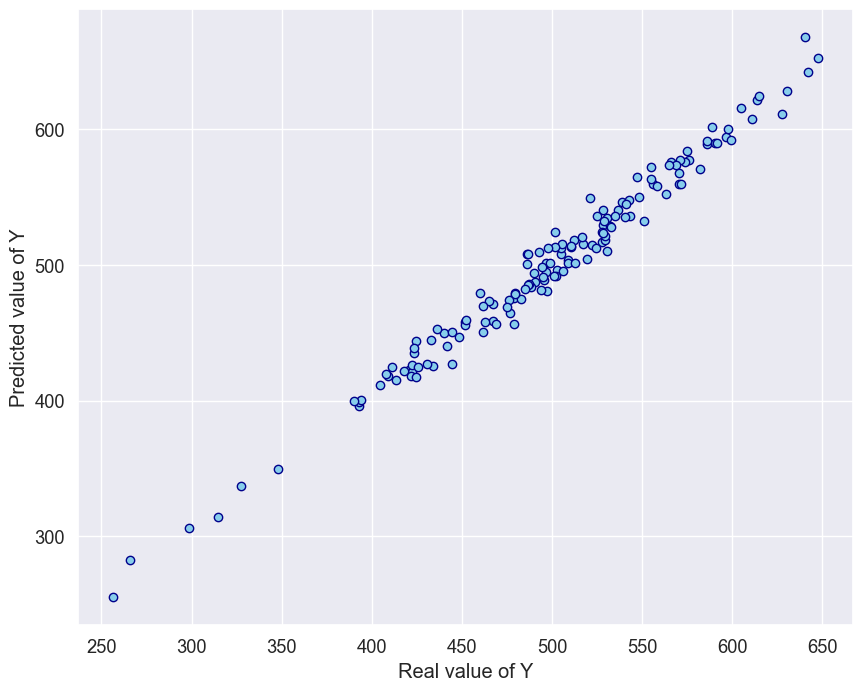

In [67]:
# Plot
plt.figure(figsize = (10, 8))
plt.scatter(x = y_test, y = pred_v1, color = 'skyblue', edgecolors = 'darkblue')
plt.xlabel('Real value of Y')
plt.ylabel('Predicted value of Y');

## Metrics

In [60]:
# Average amount spent by customers
dataset['total_spent'].mean()

499.31403826079975

In [61]:
# Minimum value
dataset['total_spent'].min()

256.6705823

In [62]:
# Maximun value
dataset['total_spent'].max()

765.5184619

In [63]:
# MAE - Mean Absolute Error
mean_absolute_error(y_test, pred_v1)

7.762418645778979

> **MAE** predicts that, on average, our model's predictions (of values spent) are wrong by approximately 7.76 reals, which is a small value compared to the average value spent per customer.

In [69]:
# MSE - Mean Squared Error
mean_squared_error(y_test, pred_v1)

94.95654308438662

In [70]:
# RMSE - Square root of the Mean Squared Error
np.sqrt(mean_squared_error(y_test, pred_v1))

9.744564797074656

> The **RMSE** predicts that, on average, our model's predictions (of amounts spent) are wrong by approximately 9.74, which is a small value compared to the average amount spent per customer. 

In [71]:
# R2 Coefficient
r2_score(y_test, pred_v1)

0.9813622791776302

In [72]:
# Explained variance
explained_variance_score(y_test, pred_v1)

0.9817449183428639

> Our model is able to explain 98% of the variance of the data, which is excellent.  

The R2 coefficient of 98% and the other metrics show that this is a very good model. 

### Residuals

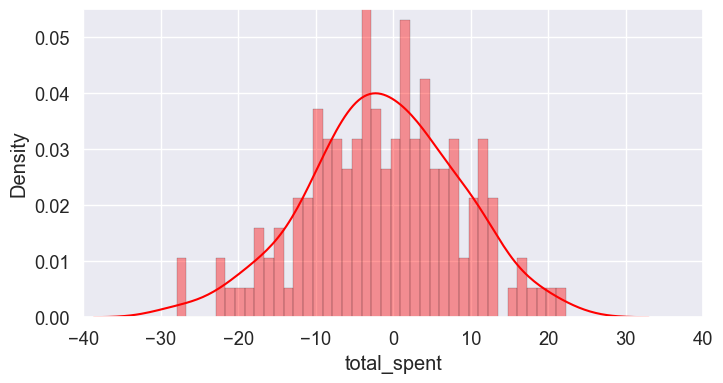

In [74]:
# Plot
plt.figure(figsize = (8, 4))
ax = sns.distplot((y_test - pred_v1),
                 bins = 40,
                 color = 'red',
                 hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim  = (0, 0.055));

## Building, Training and Evaluating Model 2 with RIDGE Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [76]:
# Create the model
model_v2 = Ridge(alpha = 1.0)

In [77]:
# Training
model_v2.fit(X_train, y_train)

Ridge()

In [78]:
print('Coefficients: \n', model_v2.coef_)

Coefficients: 
 [63.57245999 26.17198131 38.46758178  0.68013543]


In [79]:
# Coefficients of predict variables
df_coef = pd.DataFrame(model_v2.coef_, X.columns, columns=['Coefficients'])
df_coef

Coefficients
client_registration_time       63.572460
average_clicks_per_session     26.171981
total_time_logged_app          38.467582
total_time_logged_website       0.680135

In [80]:
# Predictions with test data
pred_v2 = model_v2.predict(X_test)
pred_v2[:10]

array([513.02461894, 593.71284026, 621.32208364, 495.83827761,
       641.71185412, 615.30802007, 591.87884788, 493.61867235,
       457.70805605, 531.9426755 ])

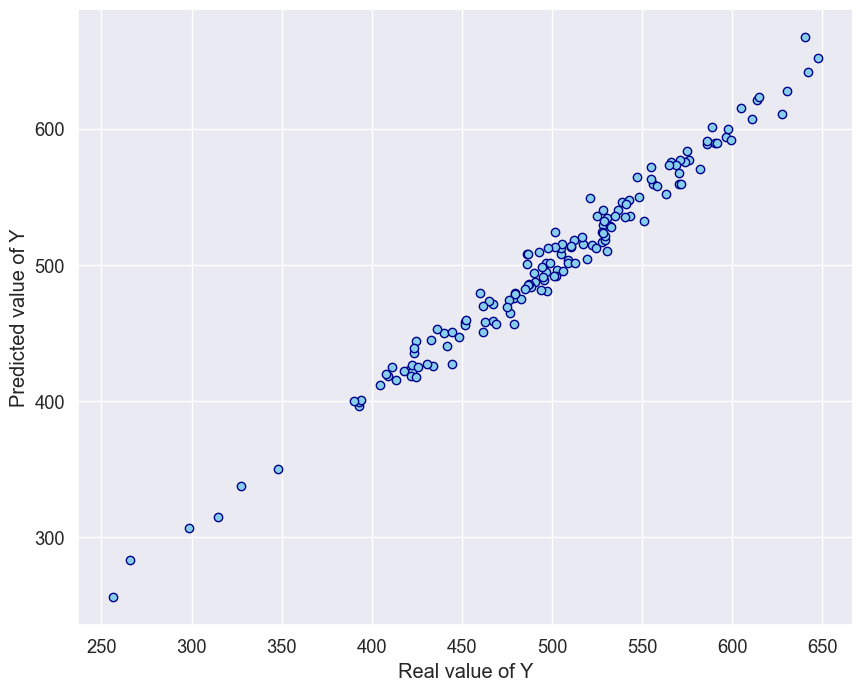

In [84]:
# Plot
plt.figure(figsize = (10, 8))
plt.scatter(x = y_test, y = pred_v2, color = 'skyblue', edgecolors = 'darkblue')
plt.xlabel('Real value of Y')
plt.ylabel('Predicted value of Y');

### Metrics

In [85]:
# MAE
mean_absolute_error(y_test, pred_v2)

7.764151148981964

In [86]:
# MSE
mean_squared_error(y_test, pred_v2)

94.93731602493467

In [87]:
# RMSE
np.sqrt(mean_squared_error(y_test, pred_v2))

9.7435781941202

In [88]:
# R2 Coefficient
r2_score(y_test, pred_v2)

0.981366052994101

In [89]:
# Explained variance
explained_variance_score(y_test, pred_v2)

0.9817472659016085

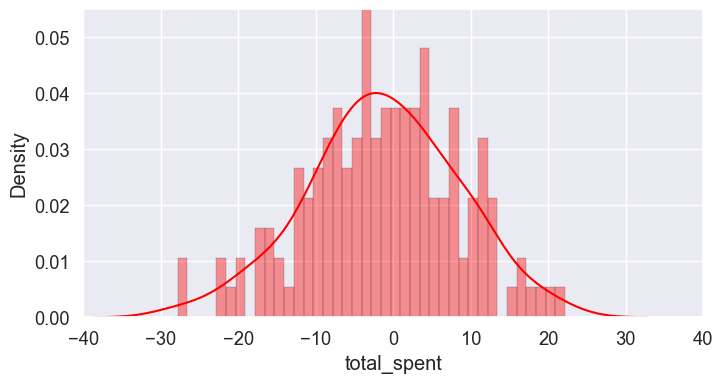

In [91]:
# Plot
plt.figure(figsize = (8, 4))
ax = sns.distplot((y_test - pred_v2),
                 bins = 40,
                 color = 'red',
                 hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

## Building, Training and Evaluating Model 3 with LASSO Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [92]:
# Create a model
model_v3 = Lasso(alpha = 1.0)

In [93]:
# Training
model_v3.fit(X_train, y_train)

Lasso()

In [94]:
print('Coefficients: \n', model_v3.coef_)

Coefficients: 
 [62.86344076 25.18747244 37.62149243  0.        ]


In [95]:
# Coefficients
df_coef = pd.DataFrame(model_v3.coef_, X.columns, columns = ['Coefficients'])
df_coef

Coefficients
client_registration_time       62.863441
average_clicks_per_session     25.187472
total_time_logged_app          37.621492
total_time_logged_website       0.000000

In [97]:
# Prediction with the test data
pred_v3 = model_v3.predict(X_test)
pred_v3[:10]

array([511.50216083, 591.78590214, 619.24047552, 497.55162062,
       640.89951717, 614.42803424, 590.05764493, 494.76617949,
       459.30498489, 529.64197449])

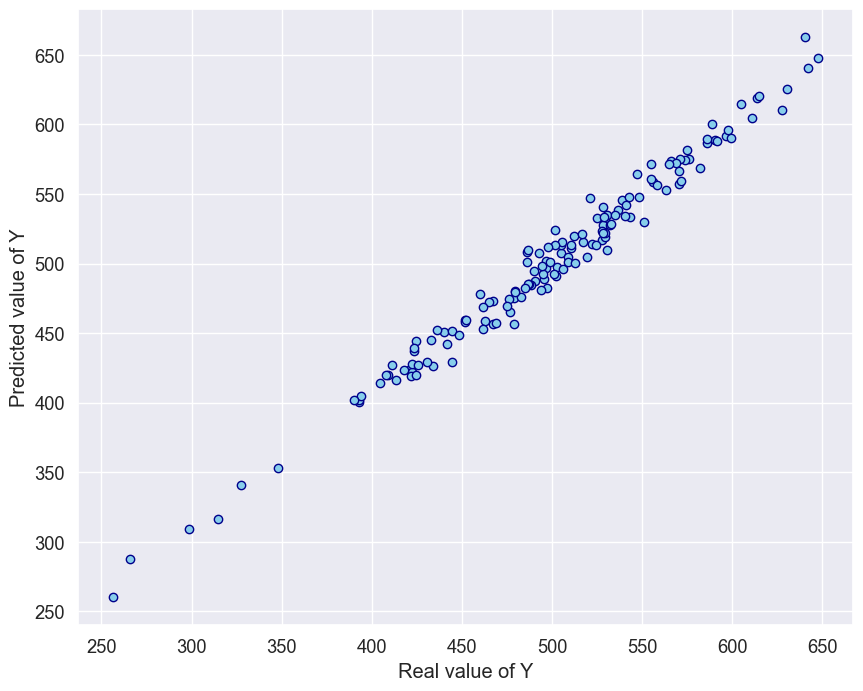

In [98]:
# Plot
plt.figure(figsize = (10, 8))
plt.scatter(x = y_test, y = pred_v3, color = 'skyblue', edgecolors = 'darkblue')
plt.xlabel('Real value of Y')
plt.ylabel('Predicted value of Y');

### Metrics

In [99]:
# MAE
mean_absolute_error(y_test, pred_v3)

7.788504696951063

In [100]:
# MSE
mean_squared_error(y_test, pred_v3)

96.0560634897067

In [101]:
# RMSE
np.sqrt(mean_squared_error(y_test, pred_v3))

9.800819531534426

In [102]:
# R2 Coefficient
r2_score(y_test, pred_v3)

0.981146469358873

In [103]:
# Explained variance
explained_variance_score(y_test, pred_v3)

0.9815600649101045

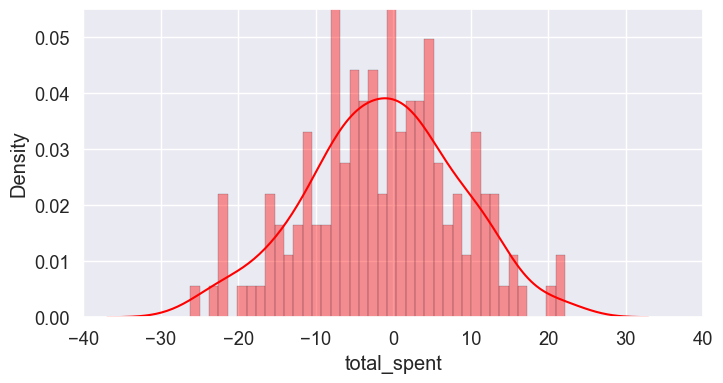

In [104]:
# Plot
plt.figure(figsize = (8, 4))
ax = sns.distplot((y_test - pred_v3),
                 bins = 40,
                 color = 'red',
                 hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

## Model Selection

Model 3 had a slightly higher error rate (RMSE) and can be discarded. Models 1 and 2 were very close and in this case, we should choose the simpler model, which in our example is model 1.

## Conclusion

In [105]:
dataset.head()

client_registration_time  average_clicks_per_session  \
0                  3.472021                   33.119954   
1                  4.198349                   35.371876   
2                  2.086348                   33.976083   
3                  3.605934                   34.034164   
4                  4.034386                   32.770492   

   total_time_logged_app  total_time_logged_website  total_spent  
0              12.953263                  37.034280   534.771485  
1              10.572467                  36.862183   537.915753  
2              11.658037                  37.425279   407.876378  
3              13.592513                  36.838657   618.845970  
4              11.371767                  35.261498   502.771075

In [106]:
# Coefficients
df_coef_final = pd.DataFrame(model_v1.coef_, X.columns, columns = ['Coefficient'])
df_coef_final

Coefficient
client_registration_time      63.742207
average_clicks_per_session    26.239016
total_time_logged_app         38.571856
total_time_logged_website      0.684737

#### Coefficient Interpretation:
- Keeping all other features fixed, an increase of 1 unit in customer registration time is associated with a 63.74 BRL increase in the amount spent per customer per month.
- Keeping all other features fixed, an increase of 1 unit in the average number of clicks per session is associated with a 26.24 BRL increase in the amount spent per customer per month.
- Keeping all other features fixed, an increase of 1 unit in the total time logged into the app is associated with a 38.57 BRL increase in the amount spent per customer per month.
- Keeping all other features fixed, an increase of 1 unit in the total time logged into the website is associated with an increase of 0.68 BRL in the amount spent per customer per month.

We can see that it will be more profitable for the company to invest in updating its app since the return will be higher. In addition, it is important to create policies to retain the customer for longer, as this also leads to increased sales. The app update itself will be a way to retain the customer longer. 

It does not pay, at this point, to invest in updating the website because the return will be minimal.

# The End